# Properties and Widgets

This notebook requires the hnxwidget package. See the [documentation](http://needthelink) for installation instructions.

Unlike the tutorials, this is an interactive demo to get you acquainted with the constructor options and how to use the widget. **Hover over the nodes and edges each time you run the widget to see how properties enhance the visual information.**

In [1]:
from collections import defaultdict
import matplotlib.pyplot as plt
import networkx as nx
import hypernetx as hnx
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
import warnings
import importlib as imp
# warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter('ignore')
from hypernetx.classes.helpers import remove_row_duplicates as rrd
from hnxwidget import HypernetxWidget as HW

## Set Systems

In [2]:
### numpy array, single property dict
np.random.seed(0)
npcol1 = np.random.choice(list("ABCD"),50)
npcol2 = np.random.choice(list("abcdefghijklmnopqrstuvwxyz"),50)

npdata = np.array([npcol1,npcol2]).T
npedge_col = 'Club'
npnode_col = 'Member'

npproperties = {k :{'affiliation': np.random.choice(['red','green'])} for k in np.concatenate([npcol1,npcol2])}

In [3]:
## LesMis data
from hypernetx.utils.toys import lesmis as lm
np.random.seed(0)
LM = lm.LesMis()
## dict
scenes = {
    "0": ('FN', 'TH'),
    "1": ('TH', 'JV'),
    "2": ('BM', 'FN', 'JA'),
    "3": ('JV', 'JU', 'CH', 'BM'),
    "4": ('JU', 'CH', 'BR', 'CN', 'CC', 'JV', 'BM'),
    "5": ('TH', 'GP'),
    "6": ('GP', 'MP'),
    "7": ('MA', 'GP')
}

### nested dict with cell_properties
scenes_with_cellprops = {ed: {ch: {'color':np.random.choice(['red','green']),'cell_weight':np.random.rand()} 
                         for ch in v} for ed,v in scenes.items()}

### dataframe
scenes_df = pd.DataFrame(pd.Series(scenes).explode()).reset_index().rename(columns={'index':'Scenes', 
                                                                                           0:'Characters'})
### dataframe with cell properties
scenes_dataframe = scenes_df.copy()
scenes_dataframe['color'] = np.random.choice(['red','green'],len(scenes_dataframe))
scenes_dataframe['heaviness'] = np.random.rand(len(scenes_dataframe))

### node and edge property data
nodes = list(set(list(np.concatenate([v for v in scenes.values()]))))
edges = list(set(list(scenes.keys())))
node_properties = {ch: {'FullName': LM.dnames.loc[ch].FullName,                               
                        'Description': LM.dnames.loc[ch].Description,
                       'color':np.random.choice(['pink','lightblue'])} for ch in nodes}
node_props_df = pd.DataFrame.from_dict(node_properties,orient='index')
default_node_weight = 10
### edge properties have missing weights and should be filled with default_edge_weight
edge_properties = defaultdict(dict)
edge_properties.update({str(ed):{'weight':np.random.randint(2,10)} for ed in range(0,8,2)})
for ed in edges:
    edge_properties[ed].update({'color':np.random.choice(['red','green'])})
default_edge_weight = 2

properties = defaultdict(dict)
for nd in nodes+edges:
    properties[nd]['color'] = np.random.choice(['red','blue','green','yellow'])
props_df = pd.DataFrame.from_dict(properties, orient='index')

### dataframe with duplicates
df1 = scenes_df.copy()
df1['cell_weights'] = 1
df2 = scenes_df.copy()
df2.Scenes = df2.Scenes.apply(lambda x : str((int(x) + 8)))
## duplicate edges
ndf = pd.concat([df1,df2])
ndf['color'] = np.random.choice(['red','lightblue','green'],len(ndf))

## duplicate cells
df3 = scenes_df.copy()
df3['cell_weights'] = 0.5
ndfc = pd.concat([df1,df3])
ndfc['color'] = np.random.choice(['lightgrey','pink','orange'],len(ndf))

In [4]:
def checkplts(h):
    fig,ax = plt.subplots(1,2,figsize=(15,6))
    hnx.draw(h,ax=ax[0])
    hnx.draw(h.dual(),ax=ax[1])


## Hypergraphs without properties

In [5]:
def test(H):
    edge = list(H.edges)[0]
    node = H.edges[edge][0]
    pair = (edge,node)
    return {'pair' : pair,
            'nodes' : list(H.nodes)[:5],
            'edges' : list(H.edges)[:5],
            'diameter': H.diameter(),
            'edge_diameter' : H.edge_diameter(),
            'linegraph': H.get_linegraph(1).edges(), 
            'info' : hnx.info_dict(H),
            'get_cell_property' : H.edges.get_cell_properties(edge,node)}


In [6]:
h = hnx.Hypergraph(npdata,edge_col=npedge_col,node_col=npnode_col)
test(h)

{'pair': ('A', 'a'),
 'nodes': ['y', 's', 'k', 'p', 'e'],
 'edges': ['A', 'B', 'C', 'D'],
 'diameter': 2,
 'edge_diameter': 1,
 'linegraph': EdgeView([('A', 'B'), ('A', 'C'), ('A', 'D'), ('B', 'C'), ('B', 'D'), ('C', 'D')]),
 'info': {'nrows': 22,
  'ncols': 4,
  'aspect ratio': 5.5,
  'ncells': 40,
  'density': 0.45454545454545453},
 'get_cell_property': {'cell_weights': 1.0}}

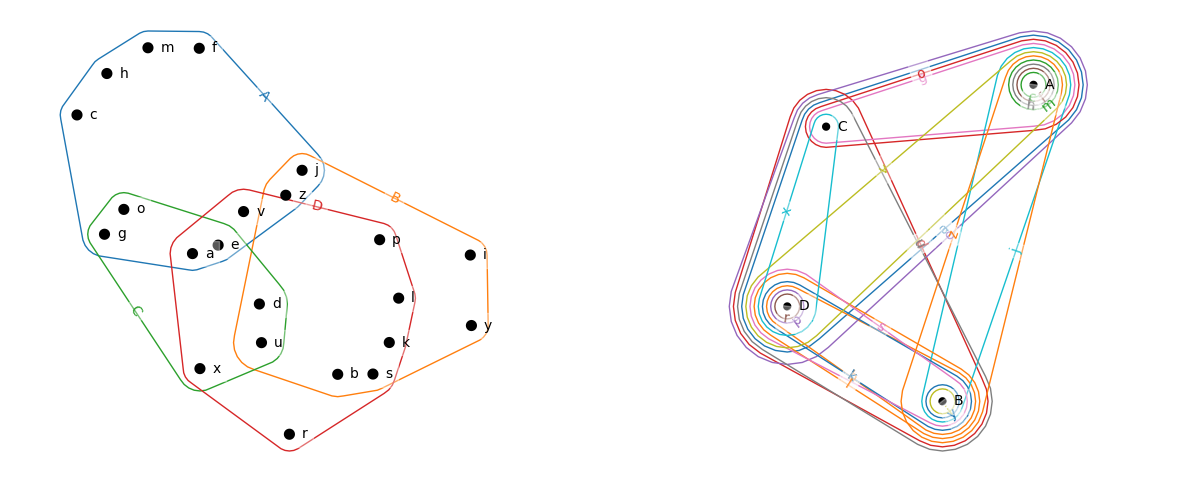

In [7]:
checkplts(h)

In [8]:
details = HW(h)
details

HypernetxWidget(component='HypernetxWidget', props={'nodes': [{'uid': 'y'}, {'uid': 's'}, {'uid': 'k'}, {'uid'…

In [9]:
h = hnx.Hypergraph(scenes)
test(h)

{'pair': ('0', 'FN'),
 'nodes': ['TH', 'BM', 'JU', 'CN', 'JA'],
 'edges': ['0', '1', '2', '3', '4'],
 'diameter': 4,
 'edge_diameter': 3,
 'linegraph': EdgeView([('0', '1'), ('0', '2'), ('0', '5'), ('1', '3'), ('1', '4'), ('1', '5'), ('2', '3'), ('2', '4'), ('5', '6'), ('5', '7'), ('3', '4'), ('6', '7')]),
 'info': {'nrows': 13,
  'ncols': 8,
  'aspect ratio': 1.625,
  'ncells': 24,
  'density': 0.23076923076923078},
 'get_cell_property': {'cell_weights': 1.0}}

In [10]:
h = hnx.Hypergraph(list(scenes.values()))
test(h)

{'pair': (0, 'FN'),
 'nodes': ['TH', 'BM', 'JU', 'CN', 'JA'],
 'edges': [0, 1, 2, 3, 4],
 'diameter': 4,
 'edge_diameter': 3,
 'linegraph': EdgeView([(0, 1), (0, 2), (0, 5), (1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (5, 6), (5, 7), (3, 4), (6, 7)]),
 'info': {'nrows': 13,
  'ncols': 8,
  'aspect ratio': 1.625,
  'ncells': 24,
  'density': 0.23076923076923078},
 'get_cell_property': {'cell_weights': 1.0}}

## Hypergraphs from setsytems with cell properties

In [11]:
def testp(H):
    edge = list(H.edges)[0]
    node = H.edges[edge][0]
    pair = (edge,node)
    HD = H.dual()
    return {
            'pair' : pair,
            'single_cell_property' : H.get_cell_properties(edge,node),
            'single_cell_weight' : H.get_cell_properties(edge,node,H._cell_weight_col),
            'single_dual_cell_property' : HD.get_cell_properties(node,edge),
            'neighbors' : H.neighbors(node),
            'edge_neighbors': H.edge_neighbors(edge),
            'line_graph': H.get_linegraph(edges=True)
            }

### Dataframes with properties

In [12]:
scenes_dataframe[:5]

,Scenes,Characters,color,heaviness
0,0,FN,red,0.315428
1,0,TH,red,0.363711
2,1,TH,red,0.570197
3,1,JV,green,0.438602
4,2,BM,green,0.988374


In [13]:
H = hnx.Hypergraph(scenes_dataframe,
                   cell_properties=['color'],
                   cell_weight_col='heaviness',
                  node_properties=node_properties,
                  edge_properties=edge_properties)
testp(H)

{'pair': ('0', 'FN'),
 'single_cell_property': {'heaviness': 0.31542835092418386, 'color': 'red'},
 'single_cell_weight': 0.31542835092418386,
 'single_dual_cell_property': {'heaviness': 0.31542835092418386,
  'color': 'red'},
 'neighbors': ['BM', 'JA', 'TH'],
 'edge_neighbors': ['1', '2', '5'],
 'line_graph': <networkx.classes.graph.Graph at 0x7fe5d2dd2df0>}

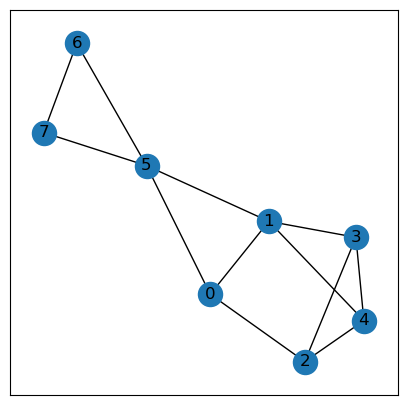

In [14]:
plt.subplots(figsize=(5,5))
nx.draw_networkx(testp(H)['line_graph'])

#### Add object properties

In [15]:
H = hnx.Hypergraph(scenes_dataframe,
                   cell_properties=['color'],
                   cell_weight_col='heaviness',
                  properties=properties)

In [16]:
H2 = H.remove('JV')

In [17]:
HW(H2)


HypernetxWidget(component='HypernetxWidget', props={'nodes': [{'uid': 'TH'}, {'uid': 'BM'}, {'uid': 'JU'}, {'u…

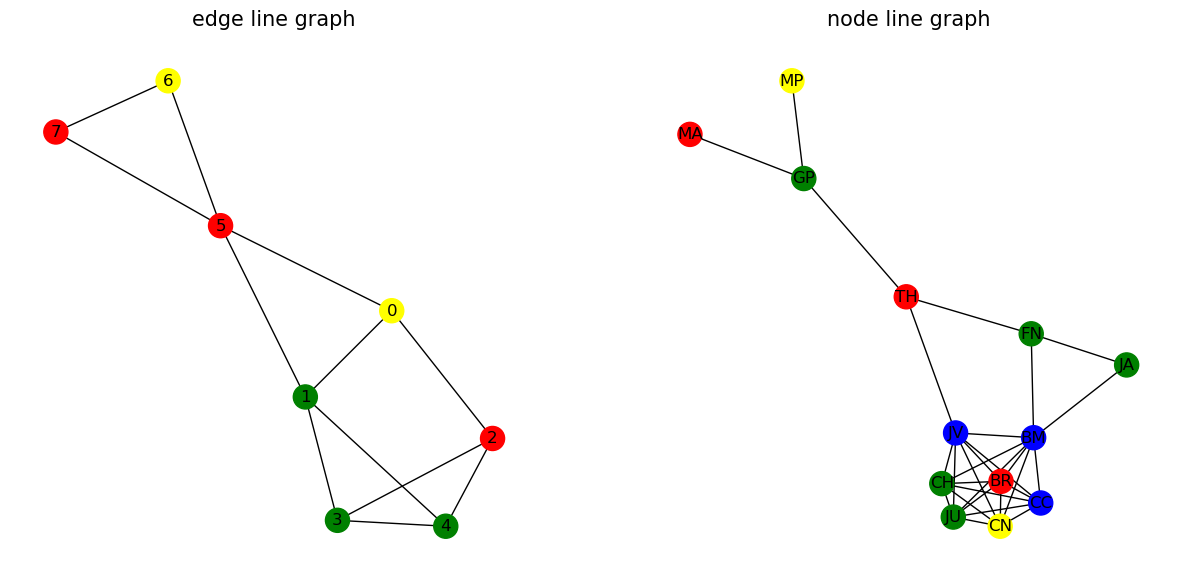

In [18]:
G1 = H.get_linegraph()
G2 = H.get_linegraph(edges=False)
nxncolors = [H.nodes[nd].color for nd in G2.nodes]
nxecolors = [H.edges[nd].color for nd in G1.nodes]
fig,ax = plt.subplots(1,2,figsize=(15,7))
nx.draw_networkx(G1,node_color = nxecolors,ax=ax[0])
ax[0].set_title('edge line graph',fontsize=15)
ax[0].axis('off')
nx.draw_networkx(G2,node_color = nxncolors,ax=ax[1])
ax[1].set_title('node line graph',fontsize=15)
ax[1].axis('off');

In [19]:
H2.nodes

### Dictionaries with properties

In [49]:
H = hnx.Hypergraph(scenes_with_cellprops,
                   edge_col='Scenes',
                   node_col='Characters',
                   cell_weight_col = 'cell_weight', 
                   cell_properties=scenes_with_cellprops)
testp(H.dual())

{'pair': ('BM', '2'),
 'single_cell_property': {'cell_weight': 0.2975346065444723,
  'cell_properties': {'color': 'red', 'cell_weight': 0.2975346065444723}},
 'single_cell_weight': 0.2975346065444723,
 'single_dual_cell_property': {'cell_weight': 0.2975346065444723,
  'cell_properties': {'color': 'red', 'cell_weight': 0.2975346065444723}},
 'neighbors': ['0', '3', '4'],
 'edge_neighbors': ['BR', 'CC', 'CH', 'CN', 'FN', 'JA', 'JU', 'JV'],
 'line_graph': <networkx.classes.graph.Graph at 0x7fe5c81e6730>}

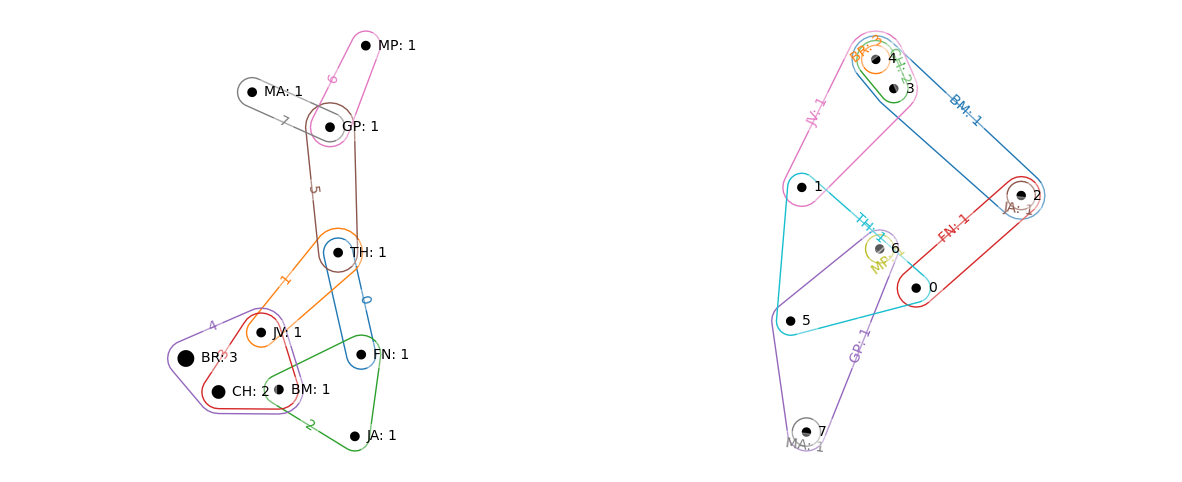

In [50]:
checkplts(H.collapse_nodes())

In [51]:
H.incidence_matrix(weights=True).todense()


matrix([[0.        , 0.        , 0.29753461, 0.64817187, 0.14335329,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.97861834,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.78052918,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.07103606, 0.14035078,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.80091075,
         0.        , 0.        , 0.        ],
        [0.59284462, 0.        , 0.96366276, 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.41466194, 0.18633234, 0.6176355 ],
        [0.        , 0.        , 0.47766512, 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.3927848 , 0.83261985,
         0.

In [52]:
H.adjacency_matrix(s=2).todense()

matrix([[0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [53]:
H.edge_adjacency_matrix().todense()

matrix([[0, 1, 1, 0, 0, 1, 0, 0],
        [1, 0, 0, 1, 1, 1, 0, 0],
        [1, 0, 0, 1, 1, 0, 0, 0],
        [0, 1, 1, 0, 1, 0, 0, 0],
        [0, 1, 1, 1, 0, 0, 0, 0],
        [1, 1, 0, 0, 0, 0, 1, 1],
        [0, 0, 0, 0, 0, 1, 0, 1],
        [0, 0, 0, 0, 0, 1, 1, 0]])

In [54]:
H.get_cell_properties('0','FN','color')

'red'

## Hypergraphs with properties on edges and nodes

In [56]:
H = hnx.Hypergraph(
    setsystem=scenes_dataframe,
    edge_col="Scenes",
    node_col="Characters",
    cell_weight_col='cell_weight',
    cell_properties=['color'],
    edge_properties=edge_properties,
    node_properties=node_properties,
    default_edge_weight=2.5,
    default_node_weight=6,
)
# H.__dict__

In [57]:
plot = HW(H,node_fill = {nd:H.nodes[nd].color for nd in H.nodes},
         edge_stroke = {ed:H.edges[ed].color for ed in H.edges},
         edge_stroke_width = {ed:12 for ed in H.edges}) #H.edges[ed].weight for ed in H.edges})
plot

HypernetxWidget(component='HypernetxWidget', props={'nodes': [{'uid': 'TH'}, {'uid': 'BM'}, {'uid': 'JU'}, {'u…

In [58]:
### Properties are preserved when removing or restricting edges
tops = H.toplexes()
HW(tops)

HypernetxWidget(component='HypernetxWidget', props={'nodes': [{'uid': 'TH'}, {'uid': 'BM'}, {'uid': 'JU'}, {'u…

In [59]:
tops.edges.properties

uid  weight                                         properties
level id                                                                
0     0     0       5                                   {'color': 'red'}
      1     1       1                                   {'color': 'red'}
      2     2       4                                 {'color': 'green'}
      4     4       3                                 {'color': 'green'}
      5     5       1                                   {'color': 'red'}
      6     6       4                                   {'color': 'red'}
      7     7       1                                 {'color': 'green'}
1     BM    8       1  {'FullName': 'Monsieur Bamatabois', 'Descripti...
      BR    9       1  {'FullName': 'Brevet', 'Description': ' convic...
      CC   10       1  {'FullName': 'Cochepaille', 'Description': ' c...
      CH   11       1  {'FullName': 'Champmathieu', 'Description': ' ...
      CN   12       1  {'FullName': 'Chenildieu', 'Description': ' co...
      FN   13       1  {'FullName': 'Fantine', 'Description': ' lover...
      GP   14       1  {'FullName': 'George Pontmercy', 'Description'...
      JA   15       1  {'FullName': 'Javert', 'Description': ' police...
      JU   16       1  {'FullName': 'Judge of Douai', 'Description': ...
      JV   17       1  {'FullName': 'Jean Valjean', 'Description': ' ...
      MA   18       1  {'FullName': 'Marius', 'Description': ' grands...
      MP   19       1  {'FullName': 'Madame Pontmercy', 'Description'...
      TH   20       1  {'FullName': 'Th\'enardier', 'Description': ' ...

### np array with node and edge data

In [60]:
npproperties

{'A': {'affiliation': 'green', 'weight': 1.0},
 'D': {'affiliation': 'green', 'weight': 1.0},
 'B': {'affiliation': 'red', 'weight': 1.0},
 'C': {'affiliation': 'green', 'weight': 1.0},
 'a': {'affiliation': 'red', 'weight': 1.0},
 'b': {'affiliation': 'red', 'weight': 1.0},
 'j': {'affiliation': 'red', 'weight': 1.0},
 'z': {'affiliation': 'green', 'weight': 1.0},
 'k': {'affiliation': 'red', 'weight': 1.0},
 'u': {'affiliation': 'green', 'weight': 1.0},
 'x': {'affiliation': 'red', 'weight': 1.0},
 'd': {'affiliation': 'green', 'weight': 1.0},
 'l': {'affiliation': 'red', 'weight': 1.0},
 's': {'affiliation': 'red', 'weight': 1.0},
 'c': {'affiliation': 'red', 'weight': 1.0},
 'e': {'affiliation': 'green', 'weight': 1.0},
 'v': {'affiliation': 'red', 'weight': 1.0},
 'f': {'affiliation': 'green', 'weight': 1.0},
 'g': {'affiliation': 'green', 'weight': 1.0},
 'i': {'affiliation': 'green', 'weight': 1.0},
 'r': {'affiliation': 'red', 'weight': 1.0},
 'p': {'affiliation': 'red', 'weigh

In [61]:
h = hnx.Hypergraph(npdata,edge_col=npedge_col,node_col=npnode_col,properties = npproperties)
HW(h)

HypernetxWidget(component='HypernetxWidget', props={'nodes': [{'uid': 'y'}, {'uid': 's'}, {'uid': 'k'}, {'uid'…

In [62]:
HW(h,node_fill={nd: h.nodes[nd].affiliation for nd in h.nodes},
      edge_stroke={ed: h.edges[ed].affiliation for ed in h.edges})

HypernetxWidget(component='HypernetxWidget', props={'nodes': [{'uid': 'y'}, {'uid': 's'}, {'uid': 'k'}, {'uid'…

## Hypergraphs with duplicate edges

In [34]:
h = hnx.Hypergraph(ndf)


In [35]:
HW(h)

HypernetxWidget(component='HypernetxWidget', props={'nodes': [{'uid': 'TH'}, {'uid': 'BM'}, {'uid': 'JU'}, {'u…

In [36]:
h1,eclasses = h.collapse_edges(return_equivalence_classes=True)
eclasses

{'0: 2': ['0', '8'],
 '1: 2': ['1', '9'],
 '10: 2': ['10', '2'],
 '11: 2': ['11', '3'],
 '12: 2': ['12', '4'],
 '13: 2': ['13', '5'],
 '14: 2': ['14', '6'],
 '15: 2': ['15', '7']}

In [37]:
HW(h1)

In [ ]:
ec = pd.DataFrame(pd.Series(eclasses).explode()).reset_index().set_index(0)
ec # = ec.rename(columns={'index':cls,0:'edge'}.set_index
ec.loc['7'].item() 
ec.to_dict()
                                                                         
                                                                       

In [ ]:
props = h.properties.reset_index()
dec = ec.to_dict()
for edid in dec:
    props.loc[props.id == edid].id = ec[edid]
props.id

In [ ]:
h

## Methods

### Restrict_to and Remove 

The same restriction can be used for remove nodes and restrict_to methods. I think this is faster than going through Entity

In [63]:
H = hnx.Hypergraph(scenes_dataframe,node_properties=node_properties,edge_properties=edge_properties)
HW(H)

HypernetxWidget(component='HypernetxWidget', props={'nodes': [{'uid': 'TH'}, {'uid': 'BM'}, {'uid': 'JU'}, {'u…

In [64]:
HW(H.restrict_to_nodes(['JV','TH','BM','FN']))

HypernetxWidget(component='HypernetxWidget', props={'nodes': [{'uid': 'FN'}, {'uid': 'TH'}, {'uid': 'JV'}, {'u…

In [65]:
HW(H.restrict_to_edges(['0','1']))

HypernetxWidget(component='HypernetxWidget', props={'nodes': [{'uid': 'FN'}, {'uid': 'TH'}, {'uid': 'JV'}], 'e…

In [66]:
HW(H.remove_edges(['0','1']))

HypernetxWidget(component='HypernetxWidget', props={'nodes': [{'uid': 'TH'}, {'uid': 'BM'}, {'uid': 'JU'}, {'u…

In [67]:
HW(H.remove(['JV','TH','2','3']))


HypernetxWidget(component='HypernetxWidget', props={'nodes': [{'uid': 'BM'}, {'uid': 'JU'}, {'uid': 'CN'}, {'u…

### Add attributes after the hypergraph has been created

In [68]:
#set hypergraph edges as dictionary
HG = { 'E1': ('A', 'C'), 'E2': ('D', 'D'), 'E3': ('A', 'B'), 'E4': ('C', 'A', 'B'), 'E5': ('B', 'C', 'D')} 
temporal_attributes = { 'E1': [(1,7)], 'E2': [(0,0), (7,8)], 'E3': [(0,1), (3,5)], 'E4': [(3,3)], 'E5': [(4,10)]} 
HGprops = {k:{'tempattr':str(v)} for k,v in temporal_attributes.items()}
#initiate temporal attributed hnx hypergraph

THG = hnx.Hypergraph(HG,properties=HGprops) 
for e in HG:
    THG.edges[e].temporal_attributes = temporal_attributes[e]
HW(THG)

HypernetxWidget(component='HypernetxWidget', props={'nodes': [{'uid': 'D'}, {'uid': 'A'}, {'uid': 'C'}, {'uid'…